# Build 

In [ ]:
%%sh
make

# Run Test Cases

In [41]:
import os
import time
repeats = 60
cores = 32 # change it to the number of the cores
outputDir="measurements/"
def runTest(cmd, testName, languageName, testcases, repeat, heavyThreadtest):
    if heavyThreadtest == testcases: 
        lightOrHeavy = "heavythread"
    else:
        lightOrHeavy = "lightthread"
    for r in range(repeat):
        outputFileName = outputDir+languageName+"."+testName+"."+lightOrHeavy+"."+str(r)+".txt"
        for t in testcases:
            runCmd0 = "echo num: "+str(t) +" >>" + outputFileName
            os.system(runCmd0)
            runCmd = cmd % t + " 2>> " + outputFileName
            bashCmd = 'GREPDB=\"'+runCmd+'\"; /bin/bash -c "$GREPDB"'
            os.system(bashCmd)
            #print(runCmd)
            #time.sleep(1)
def cleanup():
    files = outputDir + "*.txt"
    cmd  = "rm -f " + files
    os.system(cmd)
    files = outputDir + "*.dat"
    cmd  = "rm -f " + files
    os.system(cmd)
    
cleanup()

In [42]:
heavyThreadTestCases = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
lightThreadTestCases = [100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000]

####  Part I  #####

#PQ_Lime
#cmd = "time (./bin/threadring_lime 100000 %d 1)"
#runTest(cmd, "threadring", "Lime",  heavyThreadTestCases, repeats, heavyThreadTestCases)

#PQ_GO
cmd = "time (./bin/threadring_go 100000 %d)"
runTest(cmd, "threadring", "Go",  heavyThreadTestCases, repeats, heavyThreadTestCases)

#PQ_Erlang
cmd = "time (erl -noshell -pa bin -s -run threadring start -s init stop -hops 100000 -nodes %d)"
runTest(cmd, "threadring", "Erlang",  heavyThreadTestCases, repeats, heavyThreadTestCases)

#PQ_Haskell
cmd = "time (./bin/threadring_haskell 100000 %d)"
runTest(cmd, "threadring", "Haskell",  heavyThreadTestCases, repeats, heavyThreadTestCases)

#PQ_Java
cmd = "time (java -cp bin/ ThreadRing 100000 %d)"
runTest(cmd, "threadring", "Java",  heavyThreadTestCases, repeats, heavyThreadTestCases)

#PQ_Pthread
cmd = "time (./bin/threadring_pthread 100000 %d)"
runTest(cmd, "threadring", "Pthread",  heavyThreadTestCases, repeats, heavyThreadTestCases)

#PQ_Pthread
cmd = "time (./bin/threadring_pthread_mon 100000 %d)"
runTest(cmd, "threadring", "Pthread_mon",  heavyThreadTestCases, repeats, heavyThreadTestCases)

#PQ_Rust
cmd = "time (./bin/threadring_rust 100000 %d)"
runTest(cmd, "threadring", "Rust",  heavyThreadTestCases, repeats, heavyThreadTestCases)
####  Part II  #####

#PQ_Lime
#cmd = "time (./bin/threadring_lime 100000 %d 1)"
#runTest(cmd, "threadring", "Lime",  lightThreadTestCases, repeats, heavyThreadTestCases)

#PQ_GO
cmd = "time (./bin/threadring_go 100000 %d)"
runTest(cmd, "threadring", "Go",  lightThreadTestCases, repeats, heavyThreadTestCases)

#PQ_Erlang
cmd = "time (erl -noshell -pa bin -s -run threadring start -s init stop -hops 100000 -nodes %d)"
runTest(cmd, "threadring", "Erlang",  lightThreadTestCases, repeats, heavyThreadTestCases)

#PQ_Haskell
cmd = "time (./bin/threadring_haskell 100000 %d)"
runTest(cmd, "threadring", "Haskell",  lightThreadTestCases, repeats, heavyThreadTestCases)

#PQ_Rust
#cmd = "time (./bin/threadring_rust 100000 %d)"
#runTest(cmd, "threadring", "Rust",  lightThreadTestCases, repeats, heavyThreadTestCases)

In [43]:
import sys
import re
import glob
import resource

allLanguages = [ "Pthread", "Pthread_mon", "Haskell", "Go", "Erlang", "Java", "Lime", "Rust"]

outputDir="measurements/"
datap = re.compile('num:\\s+([0-9]+).*') #group 1
realp = re.compile('real\\s+([0-9]+)m([0-9]+\\.[0-9]+)s.*') #group 1 and group 2
userp = re.compile('user\\s+([0-9]+)m([0-9]+\\.[0-9]+)s.*')
sysp = re.compile('sys\\s+([0-9]+)m([0-9]+\\.[0-9]+)s.*')

def parse():
    for l in allLanguages:
        results = glob.glob("measurements/*.txt")
        #print(results)
        for f in results:
            ifp=open(f)
            ofp=open(f+'.dat', 'w+')
            line=ifp.readlines()
            row=[None, None]
            for x in line:
                if row[0] is None:
                    m = datap.match(x)
                    if m is not None:
                        row[0] = m.group(1)
                elif row[1] is None:
                    t = realp.match(x)
                    if t is not None:
                        row[1] = str((int(t.group(1))*60+float(t.group(2)))*1000)
                        #print(row[1])
                        ofp.write(row[0])
                        ofp.write(' ')
                        ofp.write(row[1])
                        ofp.write(' ')
                        ofp.write('\n')
                        row = [None, None]
            ofp.close()

parse()

In [44]:
%%file gendata.sh
./../gnuplotme --set x file $1.1.txt.dat 1 --set z avg 2 1 95 $1.*.txt.dat --plot x xaxis --plot z min-arg-max --outfile $1

Overwriting gendata.sh


In [45]:
%%sh
chmod +x ../gnuplotme

In [46]:
import os
testcases = ["threadring"] 
lightLanguages = [ "Haskell", "Go", "Erlang", "Lime"]
#lightLanguages = ["Lime"]
outputDir="measurements/"

for l in allLanguages:
    for t in testcases:
        cmd  = "bash gendata.sh "+outputDir  +l+"."+t+".heavythread"
        os.system(cmd)
for l in lightLanguages:
    for t in testcases:
        cmd  = "bash gendata.sh "+outputDir +l+"."+t+".lightthread"
        os.system(cmd)

In [74]:
%%file ThreadRing.gp

set terminal png
set output "ex_ThreadRing.png"
#set terminal postscript eps enhanced color font 'Helvetica,10'
#set output "ThreadRing.eps"
set multiplot layout 1,2 
set tmargin at screen 0.1
set bmargin at screen 0.80
set lmargin at screen 0.15
set rmargin at screen 0.55
set xlabel "Nodes"
set ylabel "Time (ms)"
set xrange [1000:9000]
set xtics rotate by -75 offset -1,0.5,0
set key left top
#set key vertical maxrows 4
#set xtics rotate by 0 offset 0,0,0

plot "measurements/Go.threadring.heavythread.data" using 1:2 title 'Go' with linespoints linecolor rgb "green" pointtype 39 pointsize 2, \
    "measurements/Erlang.threadring.heavythread.data" using 1:($2-1140) title 'Erlang' with linespoints linecolor rgb "blue" pointtype 10 pointsize 2, \
    "measurements/Java.threadring.heavythread.data" using 1:2 title 'Java' with linespoints linecolor rgb "coral" pointtype 70 pointsize 2, \
        "measurements/Pthread.threadring.heavythread.data" using 1:2 title 'Pthread' with linespoints linecolor rgb "#5F9EA0" pointtype 1 pointsize 2, \
    "measurements/Pthread_mon.threadring.heavythread.data" using 1:2 title 'PthreadMon' with linespoints linecolor rgb "cyan" pointtype 6 pointsize 2, \
    "measurements/Haskell.threadring.heavythread.data" using 1:2 title 'Haskell' with linespoints linecolor rgb "brown" pointtype 58 pointsize 2, \
    "measurements/Rust.threadring.heavythread.data" using 1:2 title 'Rust' with linespoints linecolor rgb 'gold' pointtype 50 pointsize 2         
set lmargin at screen 0.65
set rmargin at screen 0.95
set xlabel "Nodes"
#set ylabel "Time (ms)" offset 3,20,0
set xtics rotate by -75 offset -1,0.8,0
set xrange [100000:900000]
unset key

#set key left top
unset ylabel
plot "measurements/Go.threadring.lightthread.data" using 1:2 title 'Go' with linespoints linecolor rgb "green" pointtype 39 pointsize 2, \
     "measurements/Haskell.threadring.lightthread.data" using 1:2 title 'Haskell' with linespoints linecolor rgb "brown" pointtype 58 pointsize 2, \
     "measurements/Erlang.threadring.lightthread.data" using 1:($2-1140) title 'Erlang' with linespoints linecolor rgb "blue" pointtype 10 pointsize 2
unset multiplot
unset xtics

Overwriting ThreadRing.gp


In [75]:
%%sh
cat ThreadRing.gp | gnuplot

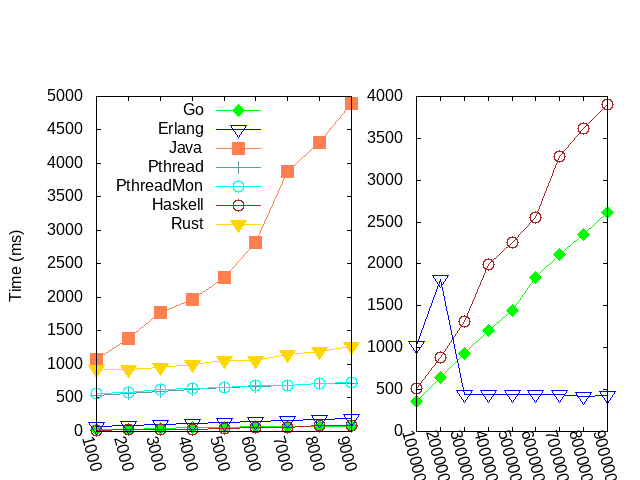

In [76]:
from IPython.display import Image
Image(filename='ex_ThreadRing.png') 